# YOGA POSE ESTIMATION MINI PROJECT

In [30]:
yogatrain='C:/Users/KIIT/Documents/DATASET/TRAIN'
yogatest='C:/Users/KIIT/Documents/DATASET/TEST'

In [31]:
import os
import matplotlib.pyplot as plt

# DATA ANALYSIS

In [32]:
import pandas as pd
import seaborn as sns

Training Data Summary:
       Pose  Image Count  Percentage
0   downdog          223   20.629047
1   goddess          180   16.651249
2     plank          266   24.606846
3      tree          160   14.801110
4  warrior2          252   23.311748
Total Training Images: 1081

Testing Data Summary:
       Pose  Image Count  Percentage
0   downdog           97   20.638298
1   goddess           80   17.021277
2     plank          115   24.468085
3      tree           69   14.680851
4  warrior2          109   23.191489
Total Testing Images: 470



C:\Users\KIIT\AppData\Local\Temp\ipykernel_16144\2510741508.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pose', y='Image Count', data=train_df, palette='viridis')


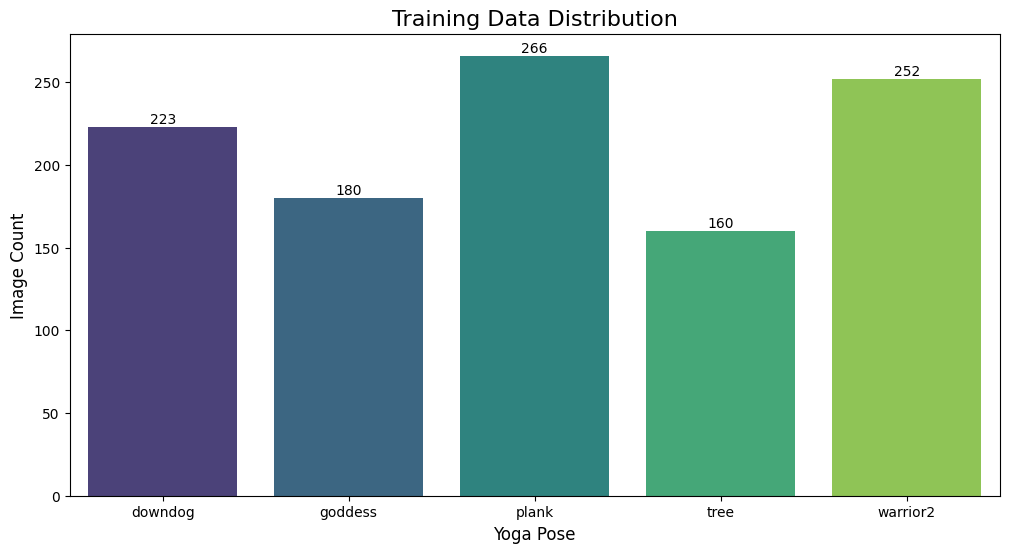

C:\Users\KIIT\AppData\Local\Temp\ipykernel_16144\2510741508.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pose', y='Image Count', data=test_df, palette='plasma')


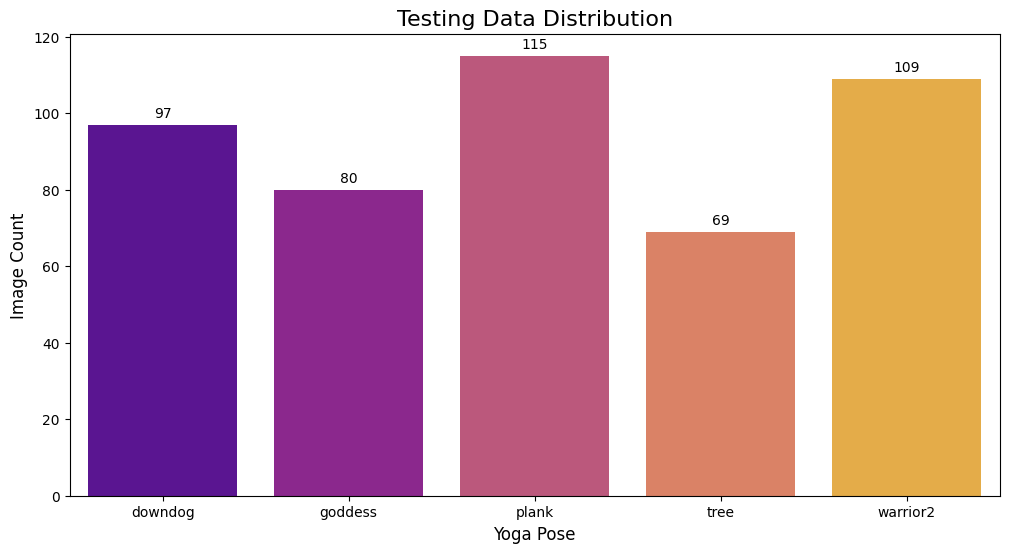

In [33]:
def count_images(data_path):
    class_counts = {}
    for folder in os.listdir(data_path):
        folder_path = os.path.join(data_path, folder)
        if os.path.isdir(folder_path):
            class_counts[folder] = len(os.listdir(folder_path))
    return class_counts

# Count images in TRAIN and TEST
train_counts = count_images(yogatrain)
test_counts = count_images(yogatest)

# Total images
total_train = sum(train_counts.values())
total_test = sum(test_counts.values())

# DataFrame for easy analysis
train_df = pd.DataFrame(list(train_counts.items()), columns=['Pose', 'Image Count'])
test_df = pd.DataFrame(list(test_counts.items()), columns=['Pose', 'Image Count'])

# Add percentages
train_df['Percentage'] = (train_df['Image Count'] / total_train) * 100
test_df['Percentage'] = (test_df['Image Count'] / total_test) * 100

# Print Summary
print("Training Data Summary:")
print(train_df)
print(f"Total Training Images: {total_train}\n")

print("Testing Data Summary:")
print(test_df)
print(f"Total Testing Images: {total_test}\n")

# Visualization: Training Data
plt.figure(figsize=(12, 6))
sns.barplot(x='Pose', y='Image Count', data=train_df, palette='viridis')
plt.title('Training Data Distribution', fontsize=16)
plt.xlabel('Yoga Pose', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
for index, value in enumerate(train_df['Image Count']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=10)
plt.show()

# Visualization: Testing Data
plt.figure(figsize=(12, 6))
sns.barplot(x='Pose', y='Image Count', data=test_df, palette='plasma')
plt.title('Testing Data Distribution', fontsize=16)
plt.xlabel('Yoga Pose', fontsize=12)
plt.ylabel('Image Count', fontsize=12)
for index, value in enumerate(test_df['Image Count']):
    plt.text(index, value + 2, f'{value}', ha='center', fontsize=10)
plt.show()

       Pose  Proportion_Train  Proportion_Test
0   downdog         20.629047        20.638298
1   goddess         16.651249        17.021277
2     plank         24.606846        24.468085
3      tree         14.801110        14.680851
4  warrior2         23.311748        23.191489


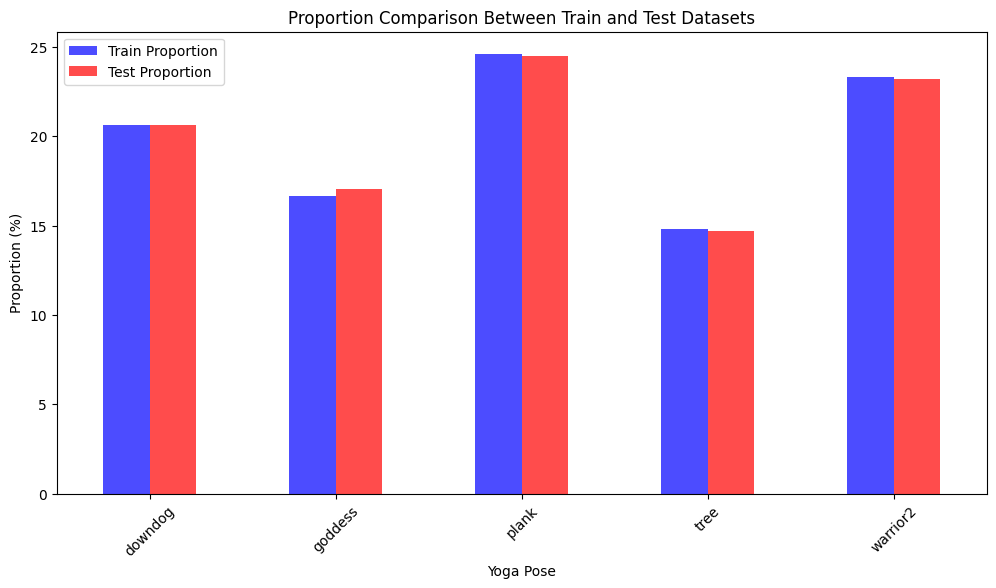

In [34]:
# Calculate Proportions of each class in Train and Test datasets
train_df['Proportion_Train'] = (train_df['Image Count'] / total_train) * 100
test_df['Proportion_Test'] = (test_df['Image Count'] / total_test) * 100

# Merge train and test dataframes for easier comparison
comparison_df = pd.merge(train_df[['Pose', 'Proportion_Train']], 
                         test_df[['Pose', 'Proportion_Test']], 
                         on='Pose', 
                         suffixes=('_Train', '_Test'))

# Display comparison
print(comparison_df)

# Visualization: Comparison of Proportions in Train and Test datasets
comparison_df.set_index('Pose')[['Proportion_Train', 'Proportion_Test']].plot(kind='bar', figsize=(12, 6), color=['blue', 'red'], alpha=0.7)
plt.title('Proportion Comparison Between Train and Test Datasets')
plt.ylabel('Proportion (%)')
plt.xlabel('Yoga Pose')
plt.xticks(rotation=45)
plt.legend(['Train Proportion', 'Test Proportion'])
plt.show()


In [35]:
print("Training Data Stats:")
print(train_df['Image Count'].describe())
print("\nTesting Data Stats:")
print(test_df['Image Count'].describe())
#Count: Number of poses.
#Mean: Average number of images per pose.
#Std: Standard deviation of the number of images across poses.
#Min/Max: Minimum and maximum number of images in any pose.
#25%, 50%, 75% Percentiles: Distribution of the image counts.

Training Data Stats:
count      5.00000
mean     216.20000
std       45.48846
min      160.00000
25%      180.00000
50%      223.00000
75%      252.00000
max      266.00000
Name: Image Count, dtype: float64

Testing Data Stats:
count      5.00000
mean      94.00000
std       19.33908
min       69.00000
25%       80.00000
50%       97.00000
75%      109.00000
max      115.00000
Name: Image Count, dtype: float64


# IMAGE ANALYSIS

In [36]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

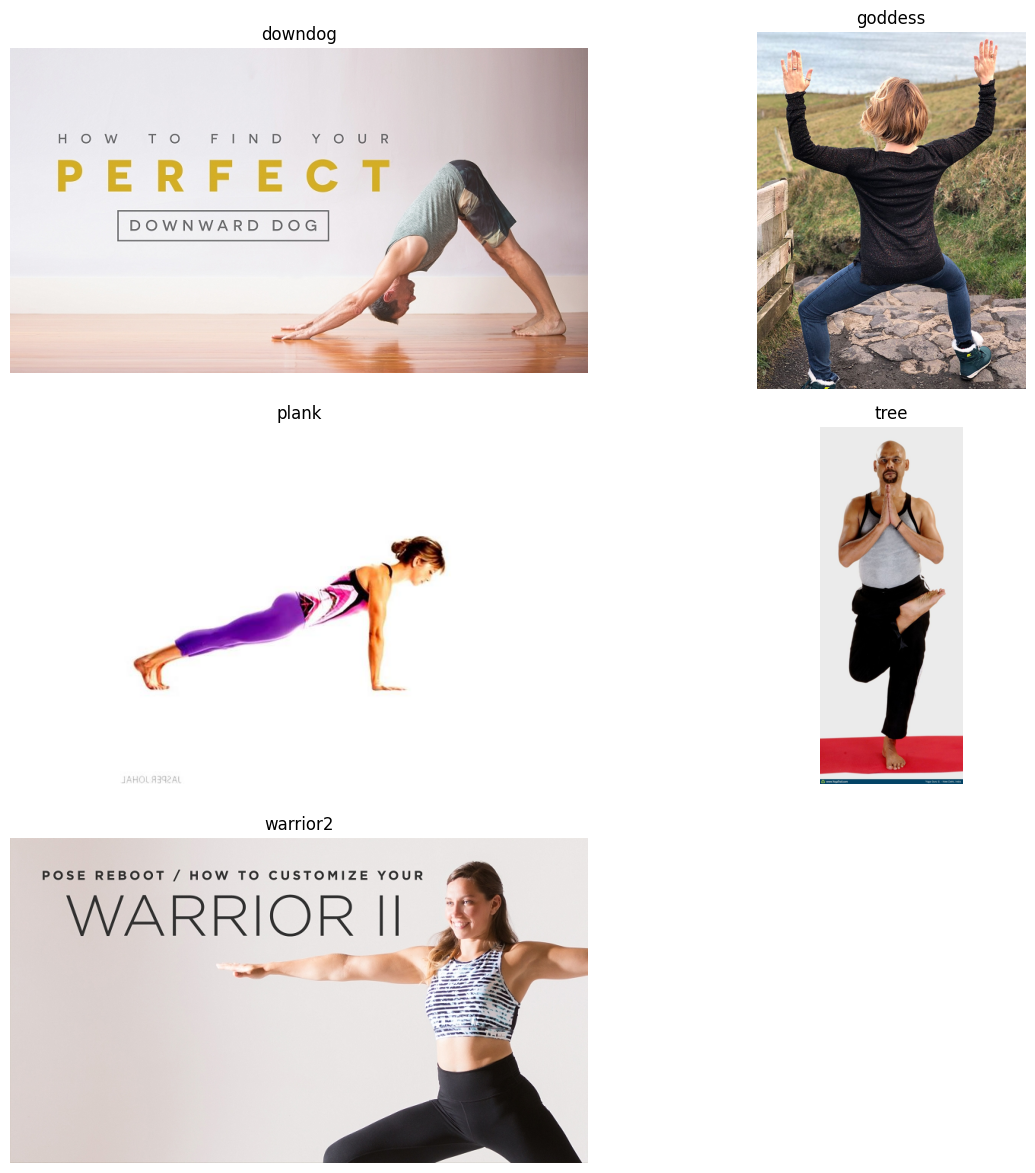

In [44]:
def visualize_samples(data_path):
    poses = os.listdir(data_path)
    plt.figure(figsize=(12, 12))
    
    for i, pose in enumerate(poses):
        pose_path = os.path.join(data_path, pose)
        if os.path.isdir(pose_path):
            # Get a random sample image from each pose folder
            sample_image = random.choice(os.listdir(pose_path))
            sample_image_path = os.path.join(pose_path, sample_image)
            
            # Plot the image
            img = mpimg.imread(sample_image_path)
            plt.subplot(3, 2, i+1)
            plt.imshow(img)
            plt.title(pose)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize random images from the training dataset
visualize_samples(yogatrain)

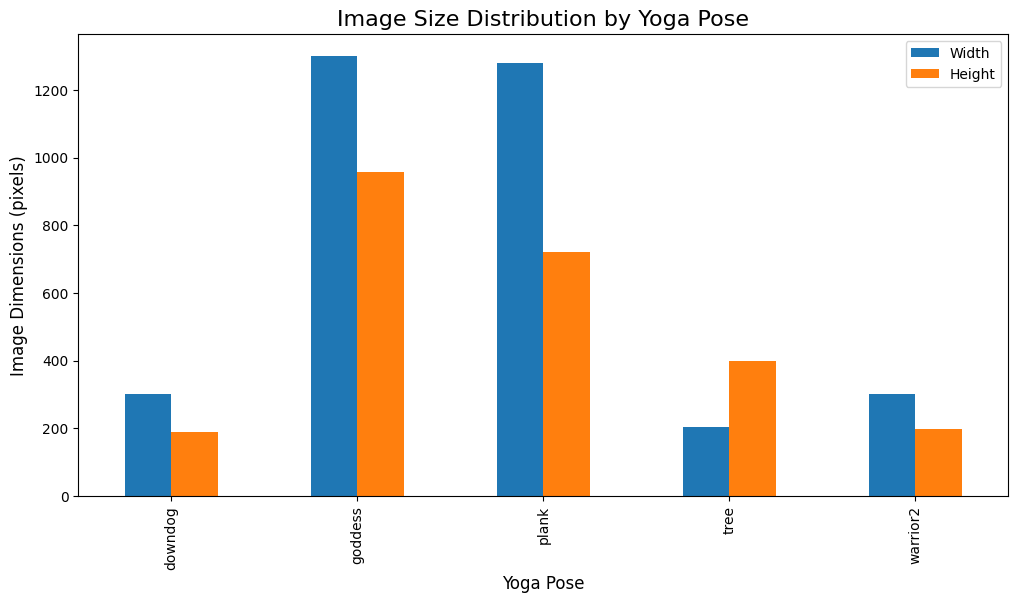

In [38]:
import cv2
#to check if they have the same size or we have to resize them 
# Function to check the size of random images from each pose class
def check_image_size(data_path):
    poses = os.listdir(data_path)
    sizes = {'Pose': [], 'Width': [], 'Height': []}
    
    for pose in poses:
        pose_path = os.path.join(data_path, pose)
        if os.path.isdir(pose_path):
            sample_image = random.choice(os.listdir(pose_path))
            sample_image_path = os.path.join(pose_path, sample_image)
            
            # Read image
            img = cv2.imread(sample_image_path)
            height, width, _ = img.shape
            
            # Save the width and height of the image
            sizes['Pose'].append(pose)
            sizes['Width'].append(width)
            sizes['Height'].append(height)
    
    size_df = pd.DataFrame(sizes)
    
    # Plot image size distribution
    size_df.set_index('Pose').plot(kind='bar', figsize=(12, 6))
    plt.title('Image Size Distribution by Yoga Pose', fontsize=16)
    plt.xlabel('Yoga Pose', fontsize=12)
    plt.ylabel('Image Dimensions (pixels)', fontsize=12)
    plt.show()

# Check and visualize the image sizes for the training dataset
check_image_size(yogatrain)


# PREPROCESSING

In [43]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from PIL import Image

In [51]:

from PIL import Image, ImageFile
# Define image dimensions
IMG_WIDTH = 224
IMG_HEIGHT = 224
ImageFile.LOAD_TRUNCATED_IMAGES = True 

# Helper function to load and preprocess images
def load_and_preprocess_images(data_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_path))  # Get class names (folders)
    
    for class_index, class_name in enumerate(class_names):
        class_folder = os.path.join(data_path, class_name)
        if os.path.isdir(class_folder):  # Check if it's a valid folder
            for img_file in os.listdir(class_folder):
                img_path = os.path.join(class_folder, img_file)
                try:
                    # Load and preprocess the image
                    img = Image.open(img_path).convert('RGB')  # Ensure it's in RGB
                    img = img.resize((IMG_WIDTH, IMG_HEIGHT))  # Resize to fixed dimensions
                    images.append(np.array(img))  # Convert to array
                    labels.append(class_index)  # Use folder index as label
                except Exception as e:
                    print(f"Skipping corrupted image: {img_path} - {e}")
    
    return np.array(images), np.array(labels), class_names

In [52]:
# Load and preprocess TRAIN and TEST datasets
print("Processing training data...")
train_images, train_labels, train_classes = load_and_preprocess_images(yogatrain)

print("Processing testing data...")
test_images, test_labels, test_classes = load_and_preprocess_images(yogatest)

# Output the shapes and class names
print(f"Train Images Shape: {train_images.shape}")
print(f"Train Labels Shape: {train_labels.shape}")
print(f"Classes: {train_classes}\n")

print(f"Test Images Shape: {test_images.shape}")
print(f"Test Labels Shape: {test_labels.shape}")
print(f"Classes: {test_classes}")

Processing training data...
Processing testing data...
Train Images Shape: (1081, 224, 224, 3)
Train Labels Shape: (1081,)
Classes: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

Test Images Shape: (470, 224, 224, 3)
Test Labels Shape: (470,)
Classes: ['downdog', 'goddess', 'plank', 'tree', 'warrior2']


In [53]:
# Normalize image data
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Data normalized!")


Data normalized!


In [54]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=len(train_classes))
test_labels = to_categorical(test_labels, num_classes=len(test_classes))

print("Labels one-hot encoded!")


Labels one-hot encoded!


# CNN

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_classes), activation='softmax')
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

print(model.summary())


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,605 (42.61 MB)

 Trainable params: 11,169,605 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
history = model.fit(
    train_images, train_labels, 
    epochs=10, 
    batch_size=32, 
    validation_data=(test_images, test_labels)
)


Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.9699 - loss: 0.0920 - val_accuracy: 0.8043 - val_loss: 0.8036
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.9736 - loss: 0.0813 - val_accuracy: 0.8149 - val_loss: 0.8080
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9806 - loss: 0.0852 - val_accuracy: 0.8340 - val_loss: 0.8731
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9747 - loss: 0.0765 - val_accuracy: 0.8170 - val_loss: 0.8274
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9768 - loss: 0.0715 - val_accuracy: 0.8128 - val_loss: 0.9030
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.9756 - loss: 0.0583 - val_accuracy: 0.8170 - val_loss: 0.9443
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.9815 - loss: 0.0601 - val_accuracy: 0.8340 - val_loss: 0.8201
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.9900 - loss: 0.0397 - val_accuracy: 0.8383 - val_loss:

In [61]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.8114 - loss: 1.0948
Test Accuracy: 81.91%


In [64]:
model.save('yoga_pose_model.h5')
print("Model saved!")


Model saved!


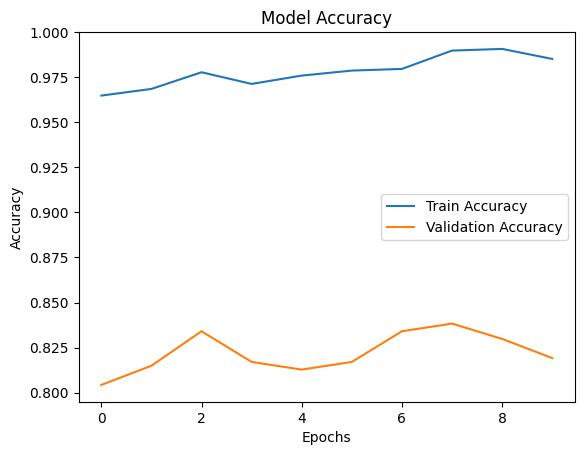

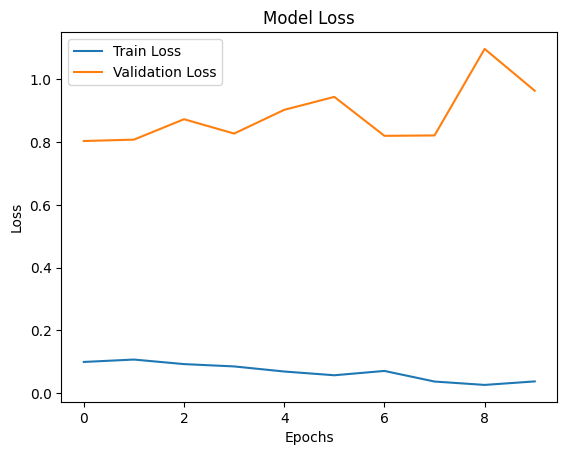

In [65]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


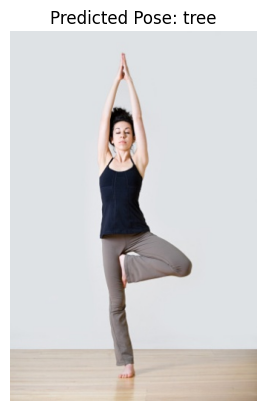

Image Path: C:/Users/KIIT/Documents/DATASET/TEST/tree/00000014.jpg
Predicted Pose: tree


In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Paths
specific_image_path = "C:/Users/KIIT/Documents/DATASET/TEST/tree/00000014.jpg"

# Load the trained model
model = load_model('yoga_pose_model.h5')

# Define classes (ensure these match your dataset folders)
classes = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']

# Load and preprocess the specific image
img = load_img(specific_image_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict the yoga pose
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)[0]
predicted_class = classes[predicted_class_index]

# Display the image and prediction
plt.imshow(load_img(specific_image_path))  # Display the original image
plt.title(f"Predicted Pose: {predicted_class}")
plt.axis('off')
plt.show()

# Print details
print(f"Image Path: {specific_image_path}")
print(f"Predicted Pose: {predicted_class}")


### POSE PREDICTION USING KNN AFTER MEDIAPIPE LANDMARKS

In [2]:
import cv2
import mediapipe as mp
import numpy as np
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [3]:
# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Define paths
yogatrain = 'C:/Users/KIIT/Documents/DATASET/TRAIN'
yogatest = 'C:/Users/KIIT/Documents/DATASET/TEST'

In [4]:
# Function to extract pose landmarks
def extract_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks).flatten()  # Flatten the array to make it suitable for machine learning
    return None

In [5]:
# Step 1: Collect training data
X_train = []
y_train = []

for folder_name in os.listdir(yogatrain):
    folder_path = os.path.join(yogatrain, folder_name)
    
    if os.path.isdir(folder_path):  # Check if it's a folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image = cv2.imread(image_path)
                landmarks = extract_landmarks(image)
                
                if landmarks is not None:
                    X_train.append(landmarks)
                    y_train.append(folder_name)  # Label corresponds to the folder name (pose class)

# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [6]:
# Encode the labels (pose names)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


In [7]:
# Step 2: Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train_encoded)

KNeighborsClassifier()

In [8]:
# Step 3: Evaluate on test set
X_test = []
y_test = []

for folder_name in os.listdir(yogatest):
    folder_path = os.path.join(yogatest, folder_name)
    
    if os.path.isdir(folder_path):  # Check if it's a folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image = cv2.imread(image_path)
                landmarks = extract_landmarks(image)
                
                if landmarks is not None:
                    X_test.append(landmarks)
                    y_test.append(folder_name)  # Label corresponds to the folder name (pose class)


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [9]:

X_test = np.array(X_test)
y_test = np.array(y_test)

# Encode the labels for test set
y_test_encoded = label_encoder.transform(y_test)

# Step 4: Make predictions on test set
y_pred = knn.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 74.77%


### POSE PREDICTION USING RANDOM FOREST ON MEDIAPIPE LANDMARKS 

In [10]:
import cv2
import mediapipe as mp
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5)
mp_drawing = mp.solutions.drawing_utils

# Define paths
yogatrain = 'C:/Users/KIIT/Documents/DATASET/TRAIN'
yogatest = 'C:/Users/KIIT/Documents/DATASET/TEST'

# Function to extract pose landmarks
def extract_landmarks(image):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    
    if results.pose_landmarks:
        landmarks = []
        for landmark in results.pose_landmarks.landmark:
            landmarks.append([landmark.x, landmark.y, landmark.z])
        return np.array(landmarks).flatten()  # Flatten the array to make it suitable for machine learning
    return None

# Step 1: Collect training data
X_train = []
y_train = []

for folder_name in os.listdir(yogatrain):
    folder_path = os.path.join(yogatrain, folder_name)
    
    if os.path.isdir(folder_path):  # Check if it's a folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image = cv2.imread(image_path)
                landmarks = extract_landmarks(image)
                
                if landmarks is not None:
                    X_train.append(landmarks)
                    y_train.append(folder_name)  # Label corresponds to the folder name (pose class)


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [11]:
# Convert to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)

# Encode the labels (pose names)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 2: Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf.fit(X_train, y_train_encoded)


RandomForestClassifier(random_state=42)

In [12]:
# Step 3: Evaluate on test set
X_test = []
y_test = []

for folder_name in os.listdir(yogatest):
    folder_path = os.path.join(yogatest, folder_name)
    
    if os.path.isdir(folder_path):  # Check if it's a folder
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            if image_name.endswith('.jpg') or image_name.endswith('.png'):
                image = cv2.imread(image_path)
                landmarks = extract_landmarks(image)
                
                if landmarks is not None:
                    X_test.append(landmarks)
                    y_test.append(folder_name)  # Label corresponds to the folder name (pose class)

C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


In [13]:
# Convert to numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Encode the labels for test set
y_test_encoded = label_encoder.transform(y_test)

# Step 4: Make predictions on test set
y_pred = rf.predict(X_test)

# Step 5: Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 87.04%


### ESTIMATION OF INDIVISUAL POSE

In [14]:
import cv2
import mediapipe as mp
import os
import json
import numpy as np

# Paths to your training poses
yoga_train_path = "C:/Users/KIIT/Documents/DATASET/TRAIN"
pose_names = ["downdog", "goddess", "plank", "tree", "warrior2"]

mp_pose = mp.solutions.pose

def extract_keypoints_from_folder(folder_path):
    """Extract keypoints from multiple images and average them for ideal keypoints."""
    keypoints_list = []
    with mp_pose.Pose(static_image_mode=True, model_complexity=2) as pose:
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".jpg") or file_name.endswith(".png"):
                image_path = os.path.join(folder_path, file_name)
                image = cv2.imread(image_path)
                if image is None:
                    continue

                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                result = pose.process(image_rgb)

                if result.pose_landmarks:
                    keypoints = [(lm.x, lm.y) for lm in result.pose_landmarks.landmark]
                    keypoints_list.append(keypoints)

    if keypoints_list:
        # Average all keypoints for this pose
        averaged_keypoints = np.mean(keypoints_list, axis=0).tolist()
        return averaged_keypoints
    else:
        return None

def generate_ideal_keypoints():
    """Generate ideal keypoints for each yoga pose and save as JSON."""
    ideal_keypoints = {}

    for pose_name in pose_names:
        folder_path = os.path.join(yoga_train_path, pose_name)
        keypoints = extract_keypoints_from_folder(folder_path)

        if keypoints is not None:
            ideal_keypoints[pose_name] = keypoints
        else:
            print(f"No keypoints found for pose: {pose_name}")

    # Save to JSON file
    with open("ideal_keypoints.json", "w") as f:
        json.dump(ideal_keypoints, f)
    print("Ideal keypoints saved to ideal_keypoints.json")

def extract_keypoints(image_path):
    """Extract keypoints from a single image using MediaPipe."""
    image = cv2.imread(image_path)
    with mp_pose.Pose(static_image_mode=True, model_complexity=2) as pose:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        result = pose.process(image_rgb)

        if result.pose_landmarks:
            return [(lm.x, lm.y) for lm in result.pose_landmarks.landmark]
        return None

def calculate_pose_accuracy(user_keypoints, ideal_keypoints):
    """Calculate percentage correctness between user keypoints and ideal keypoints."""
    total_distance = 0
    num_keypoints = len(user_keypoints)

    for user_point, ideal_point in zip(user_keypoints, ideal_keypoints):
        # Euclidean distance between user and ideal keypoint
        distance = np.linalg.norm(np.array(user_point) - np.array(ideal_point))
        total_distance += distance

    max_possible_distance = num_keypoints  # Assuming max distance per point is 1
    similarity_percentage = max(0, (1 - (total_distance / max_possible_distance)) * 100)
    return round(similarity_percentage, 2)

def evaluate_single_image(image_path):
    """Evaluate a single image and calculate pose correctness."""
    # Load ideal keypoints
    with open("ideal_keypoints.json", "r") as f:
        ideal_keypoints_dict = json.load(f)

    # Extract keypoints from the input image
    user_keypoints = extract_keypoints(image_path)

    if user_keypoints is None:
        print("No pose detected in the image.")
        return

    # Find the best-matching ideal pose and calculate correctness
    best_match_pose = None
    best_accuracy = 0

    for ideal_pose_name, ideal_keypoints in ideal_keypoints_dict.items():
        accuracy = calculate_pose_accuracy(user_keypoints, ideal_keypoints)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_match_pose = ideal_pose_name

    print(f"Predicted Pose: {best_match_pose}, Accuracy: {best_accuracy}%")

# **Step 1: Generate ideal keypoints from training data**
generate_ideal_keypoints()

# **Step 2: Evaluate an individual image**
image_path = "C:/Users/KIIT/Documents/DATASET/TEST/tree/00000000.jpg"  # Change this to your image file path
evaluate_single_image(image_path)


C:\Users\KIIT\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Ideal keypoints saved to ideal_keypoints.json
Predicted Pose: tree, Accuracy: 86.84%


In [15]:
image_path = "C:/Users/KIIT/Documents/jupyter notebook/himanshitreepose.jpg"  # Change this to your image file path
evaluate_single_image(image_path)


Predicted Pose: tree, Accuracy: 91.39%


In [16]:
image_path = "C:/Users/KIIT/Documents/jupyter notebook/arushtreepose.jpg"  # Change this to your image file path
evaluate_single_image(image_path)


Predicted Pose: tree, Accuracy: 87.23%


In [17]:
image_path = "C:/Users/KIIT/Documents/DATASET/TEST/tree/00000008.jpg"  # Change this to your image file path
evaluate_single_image(image_path)

Predicted Pose: tree, Accuracy: 89.1%


### VGG16 

In [19]:
pip install tensorflow keras opencv-python numpy matplotlib


  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl (7.5 kB)
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.5/39.5 MB 932.9 kB/s eta 0:00:42
    --------------------------------------- 0.8/39.5 MB 1.1 MB/s eta 0:00:36
   - -------------------------------------- 1.0/39.5 MB 1.1 MB/s eta 0:00:34
   - -------------------------------------- 1.3/39.5 MB 1.2 MB/s eta 0:00:33
   - -------------------------------------- 1.6/39.5 MB 1.1 MB/s eta 0:00:33
   - -------------------------------------- 1.8/39.5 MB 1.2 MB/s eta 0:00:33
   -- ------------------------------------- 2.1/39.5 MB 1.1 MB/s eta 0:00:33
   -- ------------------------------------- 2.4/39.5 MB 1.1 MB/s eta 0:00:33
   -- -----------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\KIIT\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFile
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [26]:
# Enable loading truncated images
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Paths to dataset
train_dir = 'C:/Users/KIIT/Documents/DATASET/TRAIN'
test_dir = 'C:/Users/KIIT/Documents/DATASET/TEST'

In [27]:
### Step 1: Remove Corrupted Images ###
def remove_corrupted_images(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                img_path = os.path.join(root, file)
                try:
                    img = Image.open(img_path)
                    img.verify()  # Check if image is valid
                except (IOError, OSError):
                    print(f"Removing corrupted image: {img_path}")
                    os.remove(img_path)  # Delete the corrupted image

# Clean dataset before training
remove_corrupted_images(train_dir)
remove_corrupted_images(test_dir)


In [28]:
### Step 2: Data Preprocessing ###
datagen = ImageDataGenerator(
    rescale=1.0/255, 
    rotation_range=20, 
    width_shift_range=0.2, 
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

# Training and Validation Generators
train_generator = datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_dir, 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical',
    subset='validation'
)


Found 866 images belonging to 5 classes.
Found 215 images belonging to 5 classes.


In [33]:
### Step 3: Load Pretrained VGG16 Model ###
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze VGG16 layers

# Custom Layers
x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(len(train_generator.class_indices), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])






In [ ]:
### Step 4: Train Model ###
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50
)


In [30]:
### Step 5: Save Model ###
model.save('yoga_pose_vgg16.h5')


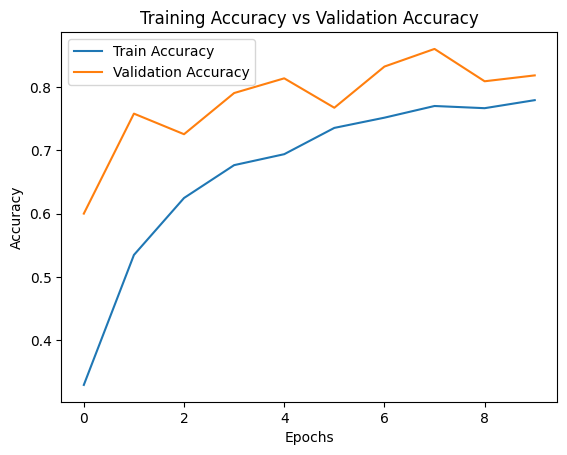

In [31]:
### Step 6: Plot Training Accuracy ###
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs Validation Accuracy')
plt.show()